In [12]:
# import inspect
# import gt
# import experiment
# import numpy as np
# 
# # Get all functions from gt.py and experiment.py
# gt_functions = [obj for name, obj in inspect.getmembers(gt) if inspect.isfunction(obj)]
# experiment_functions = [obj for name, obj in inspect.getmembers(experiment) if inspect.isfunction(obj)]
# 
# # Define the number of tests and matrix dimensions
# num_tests = 2
# max_rows = 10
# max_cols = 10
# 
# # Function to generate random matrix
# def generate_random_matrix(rows, cols):
#     return np.random.rand(rows, cols)
# 
# c=0
# 
# # Iterate over each function and test
# for gt_func, exp_func in zip(gt_functions, experiment_functions):
#     print(f"Testing function {gt_func.__name__}...")
#     for _ in range(num_tests):
#         rows = np.random.randint(1, max_rows + 1)
#         cols = np.random.randint(1, max_cols + 1)
#         A = generate_random_matrix(rows, cols)
#         B = generate_random_matrix(rows, cols)
# 
#         # Determine the number of parameters the function takes
#         num_params = len(inspect.signature(gt_func).parameters)
# 
#         try:
#             if num_params == 1:
#                 gt_output = gt_func(A)
#                 exp_output = exp_func(A)
#             elif num_params == 2:
#                 gt_output = gt_func(A, B)
#                 exp_output = exp_func(A, B)
#             else:
#                 raise ValueError(f"Function {gt_func.__name__} has unsupported parameters.")
# 
#             if not np.allclose(gt_output, exp_output):
#                 print(f"Function {gt_func.__name__} failed a test.")
#                 break
#         except Exception as e:
#             print(f"Function {gt_func.__name__} encountered an error: {e}")
#     else:
#         c+=1
#         print(f"Function {gt_func.__name__} passed all tests.")
# 
# print(f"All functions have been tested.{c}")


In [13]:
# import importlib.util
# import numpy as np
# 
# # Function to import module from file
# def import_from_file(module_name, file_path):
#     spec = importlib.util.spec_from_file_location(module_name, file_path)
#     module = importlib.util.module_from_spec(spec)
#     spec.loader.exec_module(module)
#     return module
# 
# # Import the modules
# experiment = import_from_file('experiment', 'experiment.py')
# gt = import_from_file('gt', 'gt.py')
# 
# # Function to get functions that take a single matrix as input
# def get_single_matrix_functions(module):
#     single_matrix_functions = {}
#     for attr_name in dir(module):
#         attr = getattr(module, attr_name)
#         if callable(attr):
#             num_args = attr.__code__.co_argcount - ('self' in attr.__code__.co_varnames)
#             if num_args == 1:
#                 single_matrix_functions[attr_name] = attr
#     return single_matrix_functions
# 
# experiment_funcs = get_single_matrix_functions(experiment)
# gt_funcs = get_single_matrix_functions(gt)
# 
# matching_funcs = set(experiment_funcs.keys()).intersection(gt_funcs.keys())
# 
# # Function to compare outputs of two functions
# def compare_functions(func1, func2, matrix):
#     try:
#         result1 = func1(matrix)
#         result2 = func2(matrix)
#         if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
#             # print(f"gt {result1}, exp {result2}")
#             return np.array_equal(result1, result2)
#         else:
#             return np.allclose(result1, result2, equal_nan=True)
#     except Exception as e:
#         # print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
#         return False
# 
# # Generate a random matrix
# def generate_random_matrix(size=(10, 10)):
#     return np.random.rand(*size)
# 
# # Number of tests
# num_tests = 100
# 
# # Dictionary for accuracy results
# accuracy_dict = {}
# 
# # Test each function
# for func_name in matching_funcs:
#     matches = 0
#     for _ in range(num_tests):
#         random_matrix = generate_random_matrix()
#         if compare_functions(experiment_funcs[func_name], gt_funcs[func_name], random_matrix):
#             matches += 1
#     accuracy = matches / num_tests
#     accuracy_dict[func_name] = accuracy
# 
# # Print accuracy
# c = 0
# for func_name, accuracy in accuracy_dict.items():
#     if accuracy == 1:
#         c+=1
#     print(f"Accuracy for {func_name}: {accuracy:.2f}")
# print(f"{len(accuracy_dict.items())}")
# print(f"{c/len(accuracy_dict.items())}")

In [14]:
# import importlib.util
# import numpy as np
# import time
# 
# # Function to import module from file
# def import_from_file(module_name, file_path):
#     spec = importlib.util.spec_from_file_location(module_name, file_path)
#     module = importlib.util.module_from_spec(spec)
#     spec.loader.exec_module(module)
#     return module
# 
# # Import the modules
# experiment = import_from_file('experiment', 'experiment.py')
# gt = import_from_file('gt', 'gt.py')
# 
# # Function to get functions that take a single matrix as input
# def get_single_matrix_functions(module):
#     single_matrix_functions = {}
#     for attr_name in dir(module):
#         attr = getattr(module, attr_name)
#         if callable(attr):
#             num_args = attr.__code__.co_argcount - ('self' in attr.__code__.co_varnames)
#             if num_args == 1:
#                 single_matrix_functions[attr_name] = attr
#     return single_matrix_functions
# 
# experiment_funcs = get_single_matrix_functions(experiment)
# gt_funcs = get_single_matrix_functions(gt)
# 
# matching_funcs = set(experiment_funcs.keys()).intersection(gt_funcs.keys())
# 
# # Function to compare outputs of two functions
# def compare_functions(func1, func2, matrix):
#     try:
#         start_time = time.time()  # Start time
#         result1 = func1(matrix)
#         end_time = time.time()  # End time for function 1
#         elapsed_time_func1 = end_time - start_time
# 
#         start_time = time.time()  # Restart time for function 2
#         result2 = func2(matrix)
#         end_time = time.time()  # End time for function 2
#         elapsed_time_func2 = end_time - start_time
# 
#         if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
#             return np.array_equal(result1, result2), elapsed_time_func1, elapsed_time_func2
#         else:
#             return np.allclose(result1, result2, equal_nan=True), elapsed_time_func1, elapsed_time_func2
#     except Exception as e:
#         # print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
#         return False, 0, 0
# 
# # Generate a random matrix
# def generate_random_matrix(size=(200, 200)):
#     return np.random.rand(*size)
# 
# # Number of tests
# num_tests = 1
# 
# # Dictionary for accuracy results
# performance_dict = {}
# 
# # Test each function
# for func_name in matching_funcs:
#     matches = 0
#     total_time_func1 = 0
#     total_time_func2 = 0
#     for _ in range(num_tests):
#         random_matrix = generate_random_matrix()
#         result_equal, time_func1, time_func2 = compare_functions(experiment_funcs[func_name], gt_funcs[func_name], random_matrix)
#         if result_equal:
#             matches += 1
#         total_time_func1 += time_func1
#         total_time_func2 += time_func2
#     accuracy = matches / num_tests
#     average_time_func1 = total_time_func1 / num_tests
#     average_time_func2 = total_time_func2 / num_tests
#     performance_dict[func_name] = (accuracy, average_time_func1, average_time_func2)
# 
# # Print accuracy, time for experiment and gt functions
# for func_name, (accuracy, avg_time_func1, avg_time_func2) in performance_dict.items():
#     print(f"Function {func_name}: Accuracy: {accuracy:.2f}, "
#           f"Avg. Time Func1: {avg_time_func1:.4f}s, Avg. Time Func2: {avg_time_func2:.4f}s")


In [2]:
function_arg_types = {
    'function_00': ['np.ndarray', 'np.ndarray'],
    'function_01': ['np.ndarray'],
    'function_02': ['np.ndarray'],
    'function_03': ['np.ndarray'],
    'function_04': ['np.ndarray'],
    'function_05': ['np.ndarray', 'np.ndarray'],
    'function_06': ['np.ndarray', 'np.ndarray'],
    'function_07': ['np.ndarray'],
    'function_08': ['np.ndarray'],
    'function_09': ['np.ndarray', 'np.ndarray'],
    'function_10': ['np.ndarray', 'np.ndarray'],
    'function_11': ['np.ndarray'],
    'function_12': ['np.ndarray'],
    'function_13': ['np.ndarray'],
    'function_14': ['np.ndarray'],
    'function_15': ['np.ndarray'],
    'function_16': ['np.ndarray'],
    'function_17': ['np.ndarray'],
    'function_18': ['np.ndarray'],
    'function_19': ['np.ndarray'],
    'function_20': ['np.ndarray', 'np.ndarray'],
    'function_21': ['np.ndarray', 'np.ndarray'],
    'function_22': ['np.ndarray', 'np.ndarray'],
    'function_23': ['np.ndarray', 'np.ndarray'],
    'function_24': ['np.ndarray', 'np.ndarray'],
    'function_25': ['np.ndarray', 'np.ndarray'],
    'function_26': ['np.ndarray', 'np.ndarray'],
    'function_27': ['np.ndarray', 'np.ndarray'],
    'function_28': ['np.ndarray', 'np.ndarray'],
    'function_29': ['np.ndarray', 'np.ndarray'],
    'function_30': ['np.ndarray', 'np.ndarray'],
    'function_31': ['np.ndarray', 'np.ndarray'],
    'function_32': ['np.ndarray', 'np.ndarray'],
    'function_33': ['np.ndarray', 'np.ndarray'],
    'function_34': ['np.ndarray', 'np.ndarray'],
    'function_35': ['np.ndarray', 'np.ndarray'],
    'function_36': ['np.ndarray', 'np.ndarray'],
    'function_37': ['np.ndarray', 'np.ndarray'],
    'function_38': ['np.ndarray', 'np.ndarray'],
    'function_39': ['np.ndarray', 'np.ndarray'],
    'function_40': ['np.ndarray', 'np.ndarray'],
    'function_41': ['np.ndarray', 'np.ndarray'],
    'function_42': ['np.ndarray', 'np.ndarray'],
    'function_43': ['np.ndarray', 'np.ndarray'],
    'function_44': ['np.ndarray', 'np.ndarray'],
    'function_45': ['np.ndarray', 'np.ndarray'],
    'function_46': ['np.ndarray', 'np.ndarray'],
    'function_47': ['np.ndarray', 'np.ndarray'],
    'function_48': ['np.ndarray', 'np.ndarray'],
    'function_49': ['np.ndarray', 'np.ndarray'],
    'function_50': ['np.ndarray'],
    'function_51': ['np.ndarray'],
    'function_52': ['np.ndarray', 'np.ndarray'],
    'function_53': ['np.ndarray', 'np.ndarray'],
    'function_54': ['np.ndarray', 'np.ndarray'],
    'function_55': ['np.ndarray', 'np.ndarray'],
    'function_56': ['np.ndarray', 'np.ndarray'],
    'function_57': ['np.ndarray', 'np.ndarray'],
    'function_58': ['np.ndarray', 'np.ndarray'],
    'function_59': ['np.ndarray', 'np.ndarray'],
    'function_60': ['np.ndarray', 'np.ndarray'],
    'function_61': ['np.ndarray', 'np.ndarray'],
    'function_62': ['np.ndarray', 'np.ndarray'],
    'function_63': ['np.ndarray', 'np.ndarray'],
    'function_64': ['np.ndarray', 'np.ndarray'],
    'function_65': ['np.ndarray', 'np.ndarray'],
    'function_66': ['np.ndarray', 'np.ndarray'],
    'function_67': ['np.ndarray', 'np.ndarray'],
    'function_68': ['np.ndarray', 'np.ndarray'],
    'function_69': ['np.ndarray', 'np.ndarray'],
    'function_70': ['np.ndarray', 'np.ndarray'],
    'function_71': ['np.ndarray', 'np.ndarray'],
    'function_72': ['np.ndarray', 'np.ndarray'],
    'function_73': ['np.ndarray', 'np.ndarray'],
    'function_74': ['np.ndarray', 'np.ndarray'],
    'function_75': ['np.ndarray', 'np.ndarray'],
    'function_76': ['np.ndarray', 'np.ndarray'],
    'function_77': ['np.ndarray', 'np.ndarray'],
    'function_78': ['np.ndarray', 'np.ndarray'],
    'function_79': ['np.ndarray', 'np.ndarray'],
    'function_80': ['np.ndarray', 'np.ndarray'],
    'function_81': ['np.ndarray', 'np.ndarray'],
    'function_82': ['np.ndarray', 'np.ndarray'],
    'function_83': ['np.ndarray', 'np.ndarray'],
    'function_84': ['np.ndarray', 'np.ndarray'],
    'function_85': ['np.ndarray', 'np.ndarray'],
    'function_86': ['np.ndarray', 'np.ndarray'],
    'function_87': ['np.ndarray', 'np.ndarray'],
    'function_88': ['np.ndarray', 'np.ndarray'],
    'function_89': ['np.ndarray', 'np.ndarray'],
    'function_90': ['np.ndarray', 'np.ndarray'],
    'function_91': ['np.ndarray', 'np.ndarray'],
    'function_92': ['np.ndarray', 'np.ndarray'],
    'function_93': ['np.ndarray', 'np.ndarray'],
    'function_94': ['np.ndarray', 'np.ndarray'],
    'function_95': ['np.ndarray', 'np.ndarray'],
    'function_96': ['np.ndarray', 'np.ndarray'],
    'function_97': ['np.ndarray', 'np.ndarray'],
    'function_98': ['np.ndarray', 'np.ndarray'],
    'function_99': ['np.ndarray', 'np.ndarray'],
}


In [23]:
import importlib.util
import numpy as np
import time
import inspect

SIZE = 100
# Function to import module from file
def import_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Import the modules
experiment = import_from_file('experiment', 'gt.py')
gt = import_from_file('gt', 'experiment.py')


# Function to generate random input based on specified types
def generate_random_input(input_type):
    if input_type == 'np.ndarray':
        return generate_random_matrix()
    elif input_type == 'np.array':
        return generate_random_array()
    elif input_type == 'int':
        return np.random.randint(0, 10)
    elif input_type == 'float':
        return 10 * np.random.random()
    # Add more types as needed
    else:
        raise ValueError(f"Unsupported input type: {input_type}")

# Generate a random matrix
def generate_random_matrix(size=(SIZE, SIZE)):
    return np.random.rand(*size)

def generate_random_array(size=(SIZE,)):
    return np.random.rand(*size)

# Function to get all functions from a module
def get_functions(module):
    functions = {}
    for attr_name in dir(module):
        attr = getattr(module, attr_name)
        if callable(attr):
            functions[attr_name] = attr
    return functions

experiment_funcs = get_functions(experiment)
gt_funcs = get_functions(gt)

# Function to test and compare outputs of two functions
def test_and_compare_functions(func1, func2, inputs):
    try:
        result1 = func1(*inputs)
        result2 = func2(*inputs)
        if isinstance(result1, np.ndarray) and isinstance(result2, np.ndarray):
            return np.array_equal(result1, result2)
        else:
            return np.allclose(result1, result2, equal_nan=True)
    except Exception as e:
        print(f"Error comparing functions {func1.__name__} and {func2.__name__}: {e}")
        return False

# Function to run the tests
def run_tests():
    performance_dict = {}

    # Pre-generate inputs for all functions before timing
    pregenerated_inputs = {
        func_name: [generate_random_input(arg_type) for arg_type in function_arg_types.get(func_name)]
        for func_name in function_arg_types
    }

    # For each function in the experiment module
    for func_name, func in experiment_funcs.items():
        if func_name in gt_funcs:
            gt_func = gt_funcs[func_name]
            inputs = pregenerated_inputs.get(func_name)

            if not inputs:
                print(f"No inputs generated for function {func_name}, skipping.")
                continue

            # Test the function num_tests times
            matches = 0
            total_time_experiment = 0
            total_time_gt = 0
            for _ in range(num_tests):
                # Ensure the same inputs are used for both functions
                inputs_copy = [np.copy(input) for input in inputs]

                start_time = time.perf_counter()
                if test_and_compare_functions(func, gt_func, inputs_copy):
                    matches += 1
                total_time_experiment += time.perf_counter() - start_time

                start_time = time.perf_counter()
                gt_func(*inputs_copy)
                total_time_gt += time.perf_counter() - start_time

            # Store the performance results
            accuracy = matches / num_tests
            average_time_experiment = total_time_experiment / num_tests
            average_time_gt = total_time_gt / num_tests
            performance_dict[func_name] = (accuracy, average_time_experiment, average_time_gt)

    # Print the performance results
    for func_name, (accuracy, avg_time_exp, avg_time_gt) in performance_dict.items():
        print(f"Function {func_name}: Accuracy: {accuracy:.2f}, "
              f"Avg. Time Exp: {avg_time_exp:.4f}s, Avg. Time GT: {avg_time_gt:.4f}s")


    return performance_dict


# Number of tests
num_tests = 1

performance_dict = run_tests()


/Users/vamsiimmanneni/Documents/Documents - Vamsi’s MacBook Pro/Homework/SWE GPT/FinalResearchProject/gt.py:1166: RuntimeWarning: invalid value encountered in scalar power
  result[i][j] = result[i][j] ** (1 / (2 if i == j else 3))
/Users/vamsiimmanneni/Documents/Documents - Vamsi’s MacBook Pro/Homework/SWE GPT/FinalResearchProject/experiment.py:631: RuntimeWarning: invalid value encountered in power
  row_max = np.max(dynamic, axis=1)


Function function_00: Accuracy: 1.00, Avg. Time Exp: 0.1112s, Avg. Time GT: 0.0000s
Function function_01: Accuracy: 1.00, Avg. Time Exp: 0.0169s, Avg. Time GT: 0.0007s
Function function_02: Accuracy: 1.00, Avg. Time Exp: 0.0048s, Avg. Time GT: 0.0000s
Function function_03: Accuracy: 1.00, Avg. Time Exp: 0.0033s, Avg. Time GT: 0.0000s
Function function_04: Accuracy: 1.00, Avg. Time Exp: 0.0013s, Avg. Time GT: 0.0000s
Function function_05: Accuracy: 1.00, Avg. Time Exp: 0.6018s, Avg. Time GT: 0.0002s
Function function_06: Accuracy: 1.00, Avg. Time Exp: 0.0156s, Avg. Time GT: 0.0000s
Function function_07: Accuracy: 1.00, Avg. Time Exp: 0.0203s, Avg. Time GT: 0.0000s
Function function_08: Accuracy: 1.00, Avg. Time Exp: 0.0219s, Avg. Time GT: 0.0000s
Function function_09: Accuracy: 1.00, Avg. Time Exp: 0.0301s, Avg. Time GT: 0.0000s
Function function_10: Accuracy: 1.00, Avg. Time Exp: 0.0089s, Avg. Time GT: 0.0000s
Function function_11: Accuracy: 1.00, Avg. Time Exp: 0.0023s, Avg. Time GT: 

/Users/vamsiimmanneni/Documents/Documents - Vamsi’s MacBook Pro/Homework/SWE GPT/FinalResearchProject/experiment.py:716: RuntimeWarning: divide by zero encountered in divide
  result = result * (np.tile(np.arange(n), (n, 1)) % n)


In [25]:
import matplotlib.pyplot as plt

# Assuming performance_dict is populated with your test results
# performance_dict = {...}

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_accuracy(performance_dict):
    # Assume accuracy is the first element in the values list for each key in the dictionary
    accuracies = np.array([performance_dict[func][0] for func in performance_dict])

    # Reshape the accuracies to a 10x10 grid
    accuracies_grid = accuracies.reshape((10, 10))

    # Create a color map for 0 and 1
    cmap = ListedColormap(['red', 'green'])

    # Plot the accuracy grid
    plt.figure(figsize=(8, 8))
    plt.imshow(accuracies_grid, cmap=cmap, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            plt.text(j, i, 'Pass' if accuracies_grid[i, j] == 1 else 'Fail', ha='center', va='center', color='white')

    plt.tight_layout()
    plt.savefig('images/Accuracy_Grid.png')
    plt.show()

# def plot_performance(performance_dict):
#     # Splitting the dictionary into lists for plotting
#     functions = list(performance_dict.keys())
#     accuracies = [performance_dict[func][0] for func in functions]
#     exp_times = [performance_dict[func][2] for func in functions]
#     gt_times = [performance_dict[func][1] for func in functions]
#
#     # Plot accuracy
#     plt.figure(figsize=(14, 7))
#     plt.bar(functions, accuracies, color='blue')
#     plt.xlabel('Function')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy of Functions')
#     plt.ylim(0, 1.1)  # Accuracy ranges between 0 and 1
#     plt.xticks(rotation=90)  # Rotate the function names to prevent overlap
#     plt.tight_layout()
#     plt.savefig('Accuracy 1')
#     plt.show()
#
#     # Plot time efficiency
#     fig, ax = plt.subplots(2, 1, figsize=(14, 14), sharex=True)
#
#     # Experiment times
#     ax[0].bar(functions, exp_times, color='green')
#     ax[0].set_ylabel('Experiment Time (s)')
#     ax[0].set_title('Time Efficiency (GPT 3.5)')
#
#     # Ground truth times
#     ax[1].bar(functions, gt_times, color='red')
#     ax[1].set_ylabel('Ground Truth Time (s)')
#     ax[1].set_title('Time Efficiency (Ground Truth)')
#
#     # Set common attributes
#     plt.xlabel('Function')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig('Time 1')
#     plt.show()
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from matplotlib.colors import TwoSlopeNorm
# from matplotlib.cm import Reds, Greens
# 
# def plot_performance(performance_dict):
#     functions = list(performance_dict.keys())
#     accuracies = [performance_dict[func][0] for func in functions]
#     exp_times = [performance_dict[func][2] for func in functions]
#     gt_times = [performance_dict[func][1] for func in functions]
# 
#     # Calculate the natural log of the ratio of gt_time to exp_time
#     time_ratios = np.log(np.divide(gt_times, exp_times))
# 
#     # Reshape the time_ratios to a 10x10 grid
#     time_ratios_grid = time_ratios.reshape((10, 10))
# 
#     # Normalize the color map around 0 so that positive values are green and negative values are red
#     norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=np.max(time_ratios_grid))
# 
#     # Plot the time efficiency grid
#     plt.figure(figsize=(8, 8))
#     plt.imshow(time_ratios_grid, cmap='RdYlGn', norm=norm, aspect='equal')
# 
#     # Optionally, add a grid line around the cells
#     plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#     plt.xticks([])
#     plt.yticks([])  # Hide the ticks
# 
#     # Optionally, add annotations within the squares
#     for i in range(10):
#         for j in range(10):
#             rounded_value = round(time_ratios_grid[i, j], 1)
#             color = 'white' if rounded_value > 0 else 'black'  # White text for green background, black for red
#             plt.text(j, i, f'{rounded_value:.1f}', ha='center', va='center', color=color)
#     plt.tight_layout()
#     plt.savefig('images/Time_Efficiency_Grid.png')
#     plt.show()
# 
# # Call this function after your run_tests() function to plot the results
# plot_performance(performance_dict)
# plot_accuracy(performance_dict)


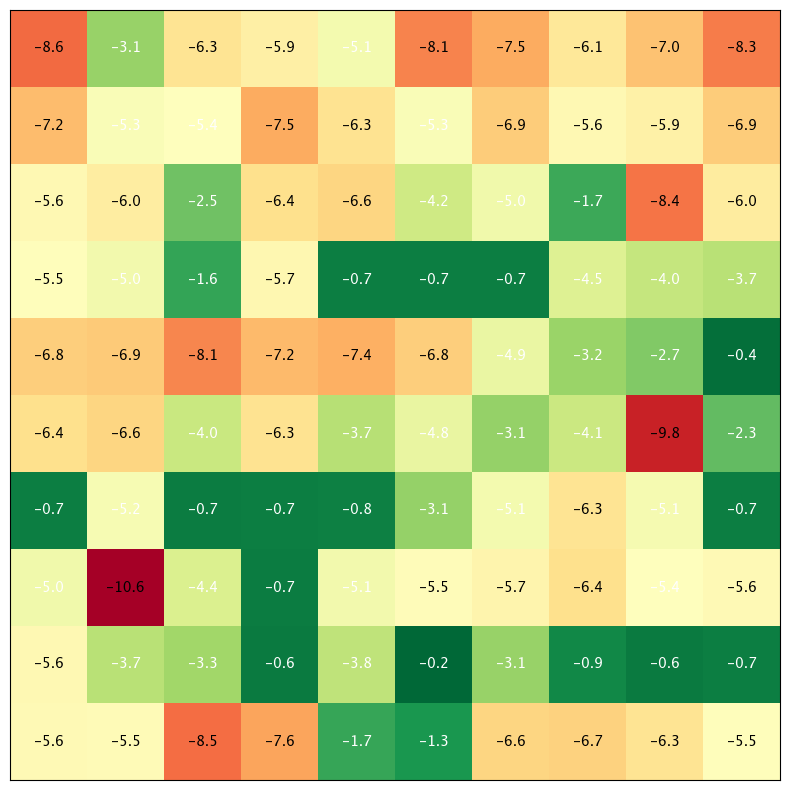

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

def plot_performance(performance_dict):
    functions = list(performance_dict.keys())
    accuracies = [performance_dict[func][0] for func in functions]
    exp_times = [performance_dict[func][2] for func in functions]
    gt_times = [performance_dict[func][1] for func in functions]
    
    for i in range(len(exp_times)):
        if exp_times[i] > gt_times[i]:
            print(exp_times[i], gt_times[i], i)
    

    # Replace zeros with small positive numbers to avoid division by zero and negative infinity in log
    exp_times = [time if time != 0 else 1e-6 for time in exp_times]
    gt_times = [time if time != 0 else 1e-6 for time in gt_times]

    # Calculate the natural log of the ratio of exp_time to gt_time
    time_ratios = np.log(np.array(exp_times) / np.array(gt_times))

    # Reshape the time_ratios to a 10x10 grid
    time_ratios_grid = (time_ratios.reshape((10, 10)))

    # Adjust vmin and vmax based on the data
    vmin, vmax = np.min(time_ratios_grid), np.max(time_ratios_grid)
    # Set vcenter as the midpoint between vmin and vmax
    vcenter = (vmin + vmax) / 2

    # Normalize the color map
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    # Plot the time efficiency grid
    plt.figure(figsize=(8, 8))
    plt.imshow(time_ratios_grid, cmap='RdYlGn', norm=norm, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            rounded_value = round(time_ratios_grid[i, j], 1)
            color = 'white' if rounded_value > vcenter else 'black'
            plt.text(j, i, f'{rounded_value:.1f}', ha='center', va='center', color=color)
    plt.tight_layout()
    plt.savefig('images/Time_Efficiency_Grid.png')
    plt.show()

plot_performance(performance_dict)


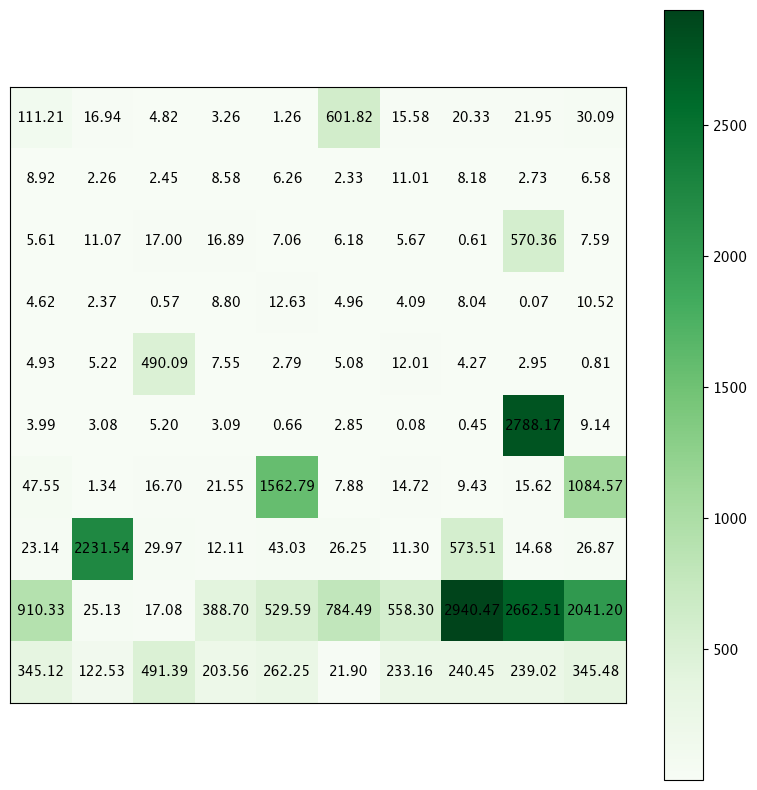

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_time_ratios_heatmap(performance_dict):
    # Extract the experiment and ground truth times from the performance dictionary
    exp_times = [performance_dict[func][2] for func in performance_dict]
    gt_times = [performance_dict[func][1] for func in performance_dict]

    # Calculate the natural log of the ratio of gt_time to exp_time
    time_ratios = np.log(np.divide(gt_times, exp_times))

    # Reshape the time_ratios to a 10x10 grid
    time_ratios_grid = np.array(gt_times).reshape((10, 10))
    time_ratios_grid = np.multiply(time_ratios_grid,1000)

    # Plot the time ratios as a heatmap
    plt.figure(figsize=(8, 8))
    norm = Normalize(vmin=np.min(time_ratios_grid), vmax=np.max(time_ratios_grid))  # Normalize the color scale
    plt.imshow(time_ratios_grid, cmap='Greens', norm=norm, aspect='equal')

    # Optionally, add a grid line around the cells
    plt.grid(which='major', axis='both', linestyle='-', color='white', linewidth=0.5)
    plt.xticks([])
    plt.yticks([])  # Hide the ticks

    # Optionally, add annotations within the squares
    for i in range(10):
        for j in range(10):
            plt.text(j, i, f'{time_ratios_grid[i, j]:.2f}', ha='center', va='center', color='black')

    # plt.title('Time Ratios Heatmap')
    plt.colorbar()  # Show color scale
    plt.tight_layout()
    plt.savefig('images/Time_Heatmap.png')
    plt.show()

# This is a placeholder for the performance_dict you would pass to the function
# performance_dict = {...}

# Uncomment the following line and pass your actual performance_dict to plot the heatmap
plot_time_ratios_heatmap(performance_dict)


In [17]:
performance_dict

{'function_00': (1.0, 0.025471541564911604, 0.0001244167797267437),
 'function_01': (1.0, 0.010044834110885859, 5.7499855756759644e-05),
 'function_02': (1.0, 0.0027677081525325775, 7.83335417509079e-06),
 'function_03': (1.0, 0.0029823333024978638, 1.2082979083061218e-05),
 'function_04': (1.0, 0.0003248341381549835, 2.77077779173851e-05),
 'function_05': (1.0, 1.1078095827251673, 0.0002927081659436226),
 'function_06': (1.0, 0.00548354210332036, 6.250105798244476e-06),
 'function_07': (1.0, 0.0028851251117885113, 1.9040890038013458e-05),
 'function_08': (1.0, 0.00017137499526143074, 4.624947905540466e-06),
 'function_09': (1.0, 0.006837666966021061, 9.374693036079407e-06),
 'function_10': (1.0, 0.006760499905794859, 5.958136171102524e-06),
 'function_11': (1.0, 0.002408333122730255, 1.1500436812639236e-05),
 'function_12': (1.0, 0.0023182500153779984, 1.074979081749916e-05),
 'function_13': (1.0, 7.825018838047981e-05, 7.087364792823792e-07),
 'function_14': (1.0, 0.00228916713967919